In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data\historic_demand_2009_2024.csv")
df.head()

,Unnamed: 0,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday
0,0,2009-01-01,1,37910,38704,33939,54,1403,0,0,...,0,0,-161,0,0,NaN,NaN,NaN,NaN,1
1,1,2009-01-01,2,38047,38964,34072,53,1403,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
2,2,2009-01-01,3,37380,38651,33615,53,1403,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
3,3,2009-01-01,4,36426,37775,32526,50,1403,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1
4,4,2009-01-01,5,35687,37298,31877,50,1403,0,0,...,0,0,-160,0,0,NaN,NaN,NaN,NaN,1


In [7]:
df["settlement_date"] = pd.to_datetime(df["settlement_date"], )
df.dtypes

Unnamed: 0                            int64
settlement_date              datetime64[ns]
settlement_period                     int64
nd                                    int64
tsd                                   int64
england_wales_demand                  int64
embedded_wind_generation              int64
embedded_wind_capacity                int64
embedded_solar_generation             int64
embedded_solar_capacity               int64
non_bm_stor                           int64
pump_storage_pumping                  int64
ifa_flow                              int64
ifa2_flow                             int64
britned_flow                          int64
moyle_flow                            int64
east_west_flow                        int64
nemo_flow                             int64
nsl_flow                            float64
eleclink_flow                       float64
scottish_transfer                   float64
viking_flow                         float64
is_holiday                      

In [8]:
df[["settlement_date"]].head()

,settlement_date
0,2009-01-01
1,2009-01-01
2,2009-01-01
3,2009-01-01
4,2009-01-01


In [9]:
# Ensure the index is unique by removing duplicate dates
# df = df[~df['settlement_date'].duplicated(keep='first')]

# Set the date column as the index
# df.set_index('settlement_date', inplace=True)

# Resample the data to a weekly frequency

df.pop("Unnamed: 0")

df_weekly = df.resample('W', on="settlement_date",).sum()
df_dayly = df.resample("D", on="settlement_date",).sum()

df_dayly.pop("settlement_period")
df_weekly.pop("settlement_period")

df_dayly.head()

,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday
settlement_date,,,,,,,,,,,,,,,,,,,,
2009-01-01,1789321,1849363,1609331,3152,67344,0,0,0,25913,81718,0,0,-5180,0,0,0.0,0.0,0.0,0.0,48
2009-01-02,1920721,1974406,1732180,14035,67344,0,0,257,18792,22477,0,0,-3758,0,0,0.0,0.0,0.0,0.0,0
2009-01-03,1897691,1952054,1705449,8898,67344,0,0,151,21214,29393,0,0,-3954,0,0,0.0,0.0,0.0,0.0,0
2009-01-04,1911407,1968670,1722709,15857,67344,0,0,222,22757,18138,0,0,-3623,0,0,0.0,0.0,0.0,0.0,0
2009-01-05,2181646,2271471,1968329,24428,67344,0,0,486,26634,-24302,0,0,-4476,0,0,0.0,0.0,0.0,0.0,0


In [10]:
# df["settlement_time"] = str(df["settlement_period"] // 2)  + ":" + df["settlement_period"].apply(lambda i: "30" if i % 2 else "00")
df["settlement_time"] = df["settlement_period"].apply(lambda i: f"{'0'+str((i-1) // 2) if len(str(((i-1) // 2))) < 2 else (i-1) // 2}:{'00' if i % 2 else '30'}")

df["settlement_date"] = df["settlement_date"].astype(str) + "T" + df["settlement_time"]
# df["settlement_datetime"] = df[["settlement_date", "settlement_time"]].agg("T".join, axis=1)
df.iloc[14301:14305]

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday,settlement_time
14301,2009-10-25T23:30,48,29199,30541,26151,1368,1737,0,0,0,...,0,-148,0,0,NaN,NaN,NaN,NaN,0,23:30
14302,2009-10-25T24:00,49,27446,29484,24481,1368,1737,0,0,0,...,0,-80,0,0,NaN,NaN,NaN,NaN,0,24:00
14303,2009-10-25T24:30,50,26401,28529,23483,1320,1737,0,0,0,...,0,-45,0,0,NaN,NaN,NaN,NaN,0,24:30
14304,2009-10-26T00:00,1,26213,28410,23659,1320,1737,0,0,0,...,0,-45,0,0,NaN,NaN,NaN,NaN,0,00:00


In [11]:
df = df[df["settlement_period"] <= 48]
df.shape

(275200, 23)

In [12]:
df["settlement_date"] = pd.to_datetime(df["settlement_date"])
df.reset_index(inplace=True, drop=True)
df.dtypes

settlement_date              datetime64[ns]
settlement_period                     int64
nd                                    int64
tsd                                   int64
england_wales_demand                  int64
embedded_wind_generation              int64
embedded_wind_capacity                int64
embedded_solar_generation             int64
embedded_solar_capacity               int64
non_bm_stor                           int64
pump_storage_pumping                  int64
ifa_flow                              int64
ifa2_flow                             int64
britned_flow                          int64
moyle_flow                            int64
east_west_flow                        int64
nemo_flow                             int64
nsl_flow                            float64
eleclink_flow                       float64
scottish_transfer                   float64
viking_flow                         float64
is_holiday                            int64
settlement_time                 

In [13]:
df.head()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday,settlement_time
0,2009-01-01 00:00:00,1,37910,38704,33939,54,1403,0,0,0,...,0,-161,0,0,NaN,NaN,NaN,NaN,1,00:00
1,2009-01-01 00:30:00,2,38047,38964,34072,53,1403,0,0,0,...,0,-160,0,0,NaN,NaN,NaN,NaN,1,00:30
2,2009-01-01 01:00:00,3,37380,38651,33615,53,1403,0,0,0,...,0,-160,0,0,NaN,NaN,NaN,NaN,1,01:00
3,2009-01-01 01:30:00,4,36426,37775,32526,50,1403,0,0,0,...,0,-160,0,0,NaN,NaN,NaN,NaN,1,01:30
4,2009-01-01 02:00:00,5,35687,37298,31877,50,1403,0,0,0,...,0,-160,0,0,NaN,NaN,NaN,NaN,1,02:00


Text(0, 0.5, 'National Demand(MW)')

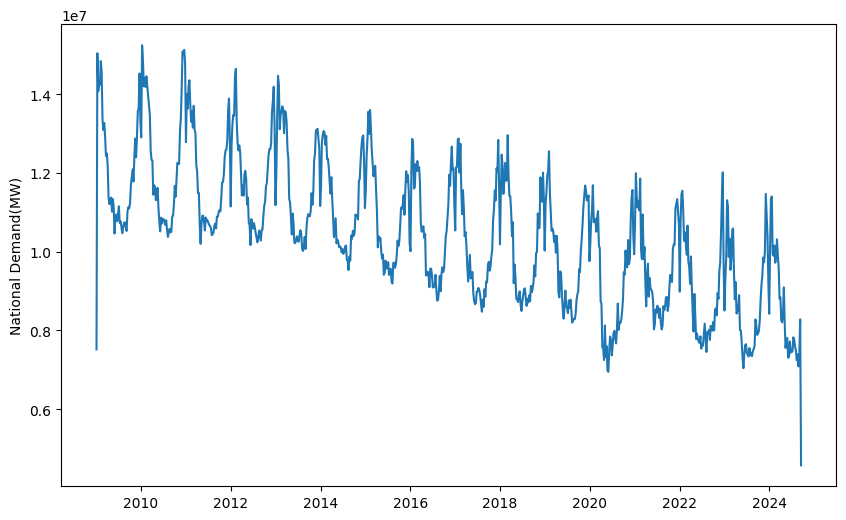

In [14]:
plt.figure(figsize = (10,6))
plt.plot(df_weekly.index, df_weekly["nd"])
plt.ylabel("National Demand(MW)")


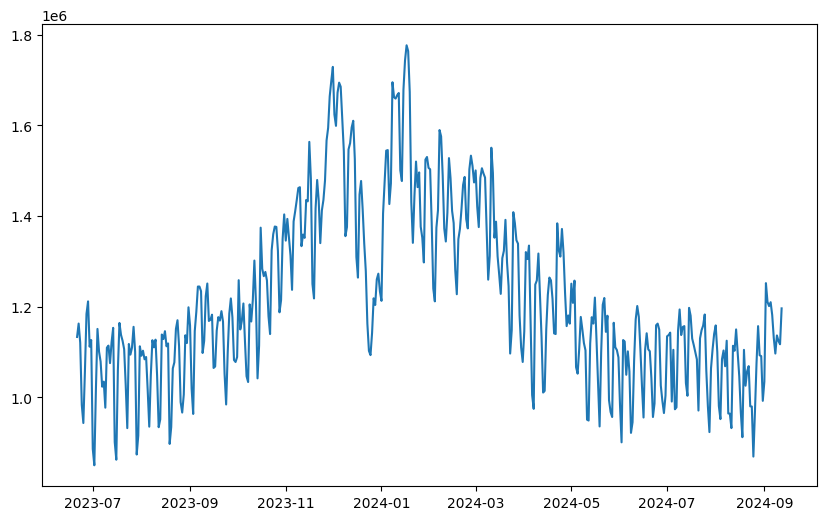

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df_dayly.index[-450:], df_dayly["nd"][-450:])

Text(0.5, 0, 'Date Time (M-D Hr)')

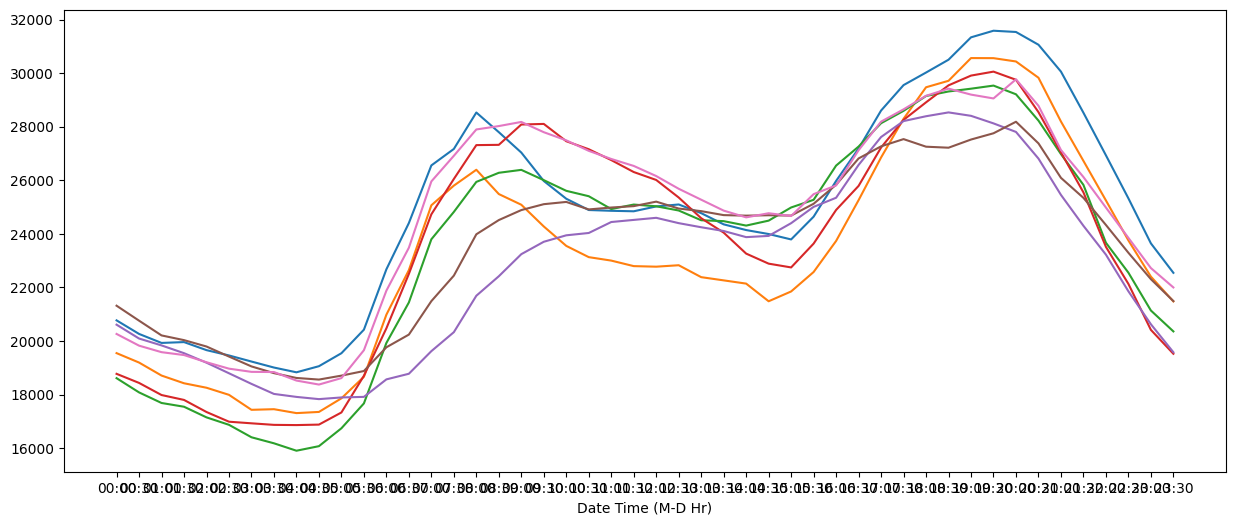

In [16]:
plt.figure(figsize=(15, 6))
for i in range(7):
    start = -48*(i+1)
    end = None if -48*i == 0 else -48*i
    day = pd.timedelta_range
    plt.plot(df["settlement_time"][start:end], df["nd"][start:end])
plt.xlabel("Date Time (M-D Hr)")
# plt.plot(df["settlement_date"][-48:None], df["nd"][-48:None])

In [17]:
df["settlement_date"][-48:]

275152   2024-09-12 00:00:00
275153   2024-09-12 00:30:00
275154   2024-09-12 01:00:00
275155   2024-09-12 01:30:00
275156   2024-09-12 02:00:00
275157   2024-09-12 02:30:00
275158   2024-09-12 03:00:00
275159   2024-09-12 03:30:00
275160   2024-09-12 04:00:00
275161   2024-09-12 04:30:00
275162   2024-09-12 05:00:00
275163   2024-09-12 05:30:00
275164   2024-09-12 06:00:00
275165   2024-09-12 06:30:00
275166   2024-09-12 07:00:00
275167   2024-09-12 07:30:00
275168   2024-09-12 08:00:00
275169   2024-09-12 08:30:00
275170   2024-09-12 09:00:00
275171   2024-09-12 09:30:00
275172   2024-09-12 10:00:00
275173   2024-09-12 10:30:00
275174   2024-09-12 11:00:00
275175   2024-09-12 11:30:00
275176   2024-09-12 12:00:00
275177   2024-09-12 12:30:00
275178   2024-09-12 13:00:00
275179   2024-09-12 13:30:00
275180   2024-09-12 14:00:00
275181   2024-09-12 14:30:00
275182   2024-09-12 15:00:00
275183   2024-09-12 15:30:00
275184   2024-09-12 16:00:00
275185   2024-09-12 16:30:00
275186   2024-

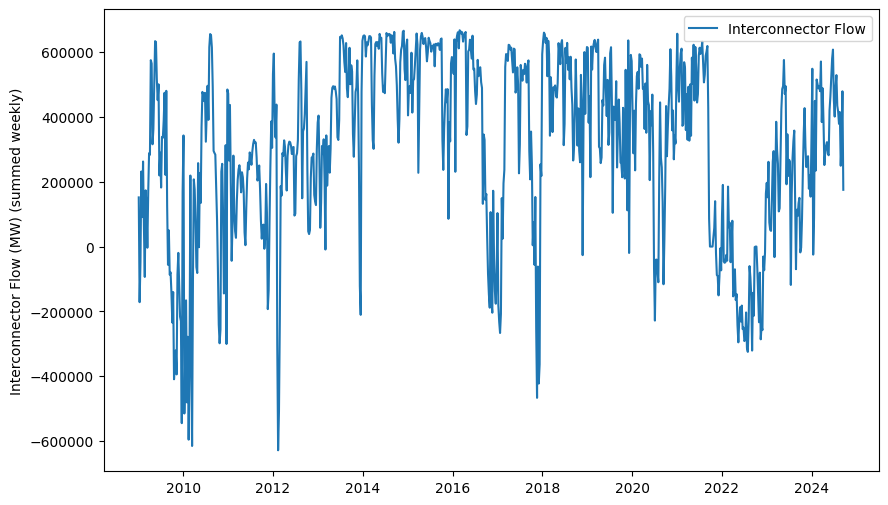

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_weekly.index, df_weekly["ifa_flow"], label="Interconnector Flow")
# plt.plot(df_weekly.index, df_weekly["ifa_flow"], label="Interconnector Flow 2?")
plt.ylabel("Interconnector Flow (MW) (summed weekly)")
plt.legend()